# Introduction to neural network classification with TensorFlow

In this notebook we're going to learn how to write neural network for classification problems.

A classification is where you try to classify something as one thing or another.

A few types of classification problems:
* Binary classification
* Multiclass classification
* Multilabel classification

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create cirles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [2]:
# Check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is a little hard to understand right now... let's visualize it!

In [4]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [5]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

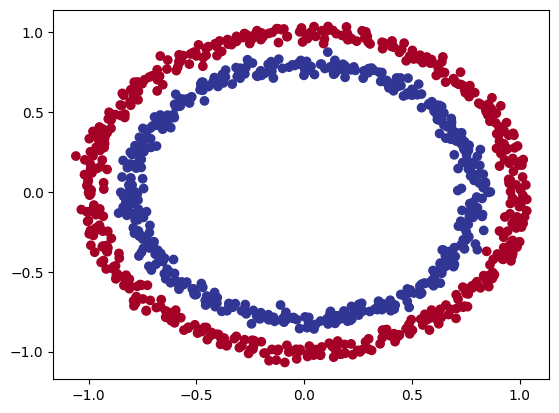

In [6]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

## Input and output shapes

In [7]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [8]:
# How many samples we are working
len(X), len(y)

(1000, 1000)

In [9]:
# View the first example of features and labels
X[17], y[17]

(array([ 0.1070617, -0.7930922]), 1)

## Steps in modelling

The steps in modelling with TensorFlow are typically:

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate...

In [10]:
import tensorflow as tf
tf.__version__

'2.12.0'

In [11]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Seqential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["accuracy"])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 3ms/step - loss: 5.9365 - accuracy: 0.4880
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 5.4637 - accuracy: 0.4850
Epoch 3/5
32/32 [==============================] - 0s 4ms/step - loss: 4.1841 - accuracy: 0.4700
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 1.0638 - accuracy: 0.4960
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7220 - accuracy: 0.4950


In [12]:
# Let's try and improve our model by training for longer...
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Since we're working on a binary classification problem and our model is getting around 50% accuracy... it's performing as if it's guessing.

So let's step things up a notch and add an extra layer.

In [13]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model, this time with 2 layers
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["accuracy"])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

In [14]:
# 4. Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 7.6246 - accuracy: 0.5000


[7.6246185302734375, 0.5]

In [15]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

## Improving our model

Let's look into our bag of tricks to see how we can improve our model.

1. Create a model - we might want to add more layers or increase the number of hidden units within a layer.
2. Compiling a model - here we might want to choose a different optimization function such as Adam instead of SGD
3. Fitting a model - perhaps we might fit our model for more epochs (leave it training for longer).


In [16]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (this time with 3 layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # add 100 dense neurons
    tf.keras.layers.Dense(10), # add another layer with 10 neurons
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

In [17]:
# 4. Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6974 - accuracy: 0.5140


[0.6973679661750793, 0.5139999985694885]

To visualize our model's predictions, let's create a function `plot_decision_boundary()`, this function will:

* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between different zones (where each unique class falls)

In [18]:
import numpy as np

In [19]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X value (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multi-class classification")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha = 0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s = 40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 1ms/step
doing binary classification


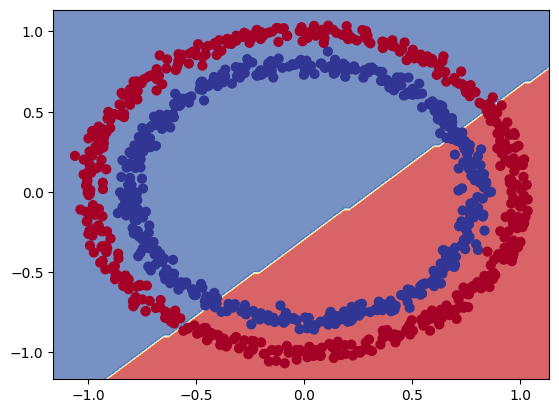

In [20]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_3, X=X, y=y)

In [21]:
# Let's see if our model can be used for a regression problem...

tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = x + 100

# Split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the regression data
model_3.fit(X_reg_train, y_reg_train, epochs=100)


Epoch 1/100


ValueError: ignored

We compiled our model for a binary classification problem.

But... we're now working on a regression problem, let's change the model to suit our data.

In [22]:
# Setup random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

# 2. Compile the model, this time with a regression-specific loss function
model_3.compile(loss=tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 664.9502 - mae: 664.9502
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 535.1733 - mae: 535.1734
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 412.0193 - mae: 412.0193
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 285.8448 - mae: 285.8448
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 155.9214 - mae: 155.9214
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 53.6520 - mae: 53.6520
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 86.2237 - mae: 86.2237
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 77.3509 - mae: 77.3509
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 47.8792 - mae: 47.8792
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 52.8214 - mae: 52.8214
Epoch 11/100
5/5 [==============================]

2/2 [==============================] - 0s 5ms/step


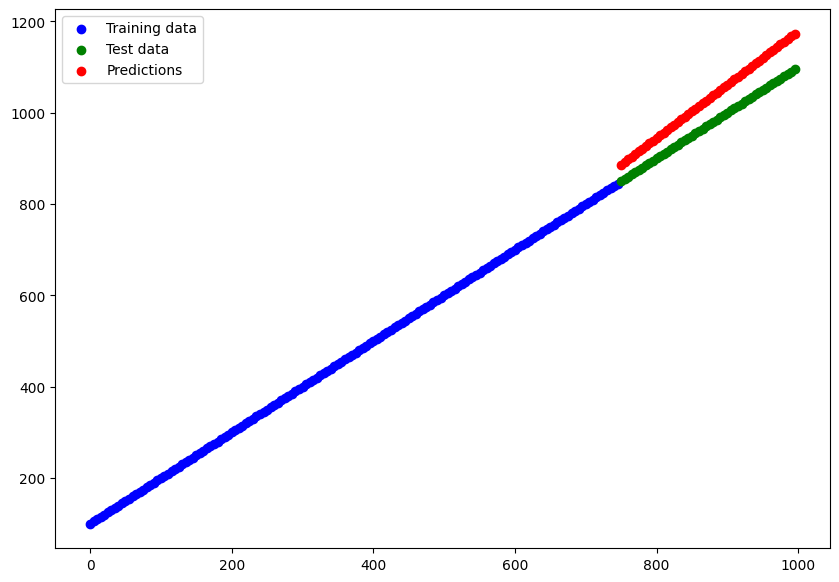

In [23]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend();

## The missing piece: Non-linearity

In [24]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation = "linear")
])

# 2. Compile the model
model_4.compile(loss = "binary_crossentropy", # same as tf.keras.losses.binary_crossentropy
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# 3. Fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 6.2723 - accuracy: 0.4870
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 6.2391 - accuracy: 0.4850
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 6.2348 - accuracy: 0.4850
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 6.2125 - accuracy: 0.4850
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 6.2099 - accuracy: 0.4850
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 6.2082 - accuracy: 0.4850
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 6.2067 - accuracy: 0.4850
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 6.1656 - accuracy: 0.4870
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 6.1532 - accuracy: 0.4860
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 6.1270 - accuracy: 0.4850
Epoch 11/

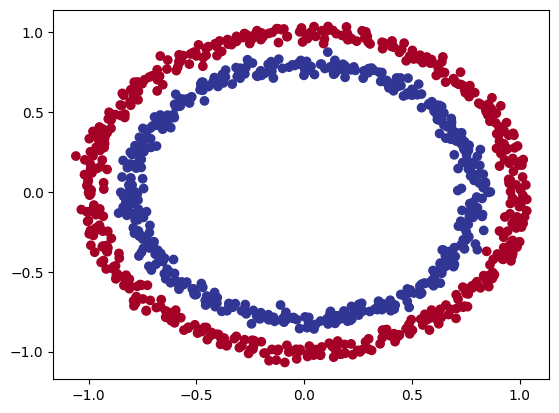

In [25]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

313/313 [==============================] - 0s 858us/step
doing binary classification


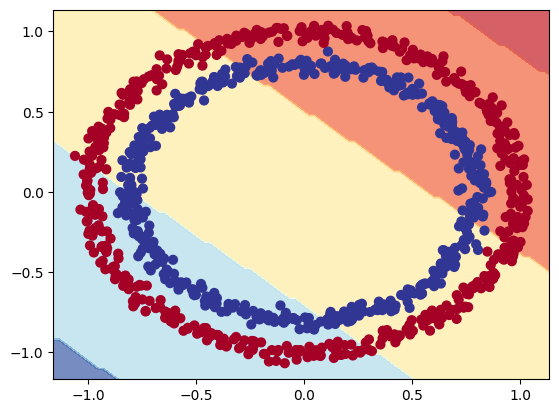

In [26]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_4, X=X, y=y)

Let's try build our first neural network with a non-linear activation function.


In [27]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model with a non-linear activation
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="relu")
])

# 2. Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# 3. Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 5.7554 - accuracy: 0.4840
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 5.7080 - accuracy: 0.4800
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 5.6706 - accuracy: 0.4810
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 5.6655 - accuracy: 0.4820
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 5.6616 - accuracy: 0.4820
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 5.6580 - accuracy: 0.4810
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 5.6168 - accuracy: 0.4840
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 5.5584 - accuracy: 0.4820
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 5.5247 - accuracy: 0.4850
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 5.4560 - accuracy: 0.4860
Epoch 11/

In [28]:
# Time to replicate the multi-layer neural network from TensorFlow playground in code...

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_6.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# 3. Fit the model
model_6.fit(X, y, epochs=200)

Epoch 1/200
32/32 [==============================] - 1s 2ms/step - loss: 4.5136 - accuracy: 0.5000
Epoch 2/200
32/32 [==============================] - 0s 1ms/step - loss: 4.1225 - accuracy: 0.5000
Epoch 3/200
32/32 [==============================] - 0s 1ms/step - loss: 3.9107 - accuracy: 0.5000
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 3.6590 - accuracy: 0.5000
Epoch 5/200
32/32 [==============================] - 0s 1ms/step - loss: 3.2347 - accuracy: 0.5000
Epoch 6/200
32/32 [==============================] - 0s 1ms/step - loss: 2.8176 - accuracy: 0.5000
Epoch 7/200
32/32 [==============================] - 0s 2ms/step - loss: 1.3026 - accuracy: 0.5000
Epoch 8/200
32/32 [==============================] - 0s 2ms/step - loss: 0.9878 - accuracy: 0.5000
Epoch 9/200
32/32 [==============================] - 0s 2ms/step - loss: 0.9311 - accuracy: 0.4980
Epoch 10/200
32/32 [==============================] - 0s 2ms/step - loss: 0.8932 - accuracy: 0.4570
Epoch 11/

In [29]:
# Evaluate the model
model_6.evaluate(X, y)

32/32 [==============================] - 0s 941us/step - loss: 0.6081 - accuracy: 0.6230


[0.6081124544143677, 0.6230000257492065]

313/313 [==============================] - 0s 829us/step
doing binary classification


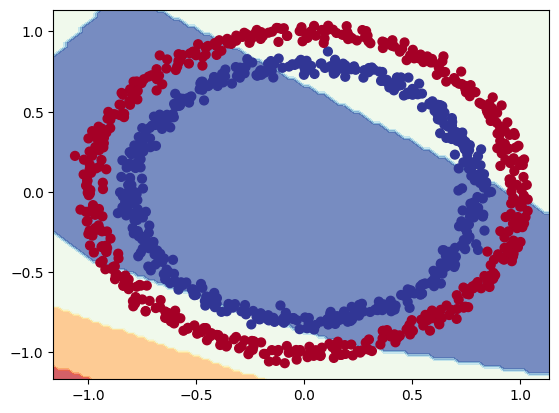

In [30]:
# How do our model predictions look?
plot_decision_boundary(model_6, X, y)

In [31]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics = ["accuracy"])

# 3. Fit the model
model_7.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6916 - accuracy: 0.5080
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.5280
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6908 - accuracy: 0.5290
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6905 - accuracy: 0.5260
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6903 - accuracy: 0.5280
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6900 - accuracy: 0.5200
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6896 - accuracy: 0.5250
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6893 - accuracy: 0.5280
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6890 - accuracy: 0.5310
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6886 - accuracy: 0.5200
Epoch 11/

In [32]:
# 4. Evaluate the model
model_7.evaluate(X, y)

32/32 [==============================] - 0s 973us/step - loss: 0.3436 - accuracy: 0.9470


[0.34362858533859253, 0.9470000267028809]

313/313 [==============================] - 0s 869us/step
doing binary classification


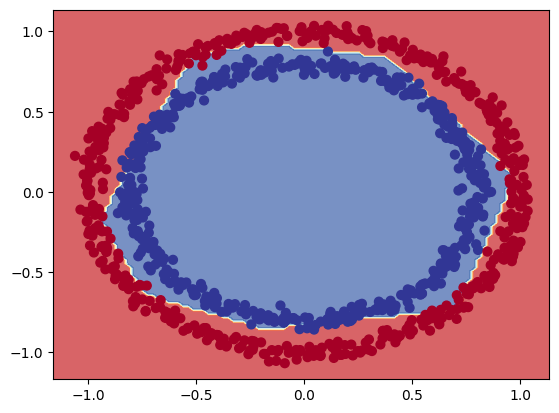

In [33]:
# Let's visualize our incredible metrics
plot_decision_boundary(model_7, X, y)

**Note:** The combination of **linear (straight lines) and non-linear (non-straight lines) functions** is one of the key fundamentals of neural networks.

Now we've discussed the concept of linear and non-linear functions (or lines), let's see them in action.

In [34]:
# Create a toy tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

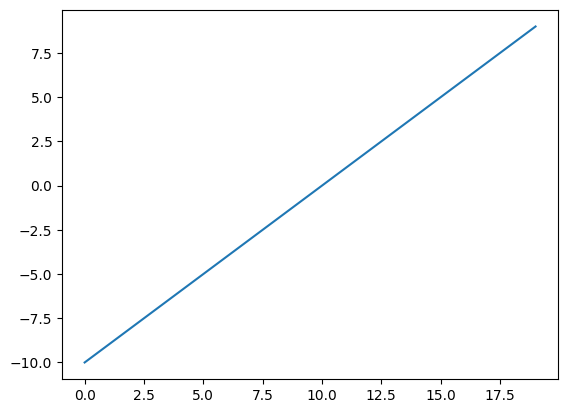

In [35]:
# Visualize our toy tensor
plt.plot(A)

In [36]:
# Let's start by replicating sigmoid - sigmoid(x) = 1 / (1 + np.exp(-x))

def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

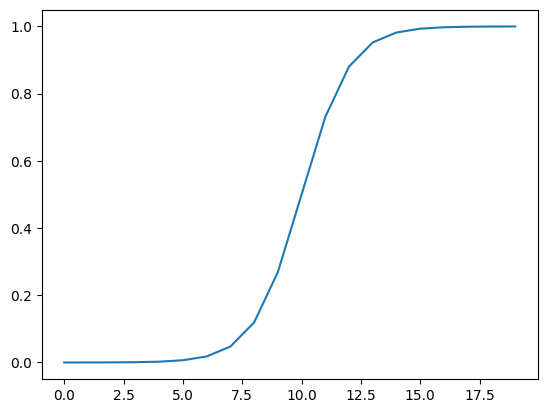

In [37]:
# Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A));

In [38]:
# Let's recreate the relu function
def relu(x):
  return tf.maximum(x,0)

# Pass our toy tensor to our custom relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

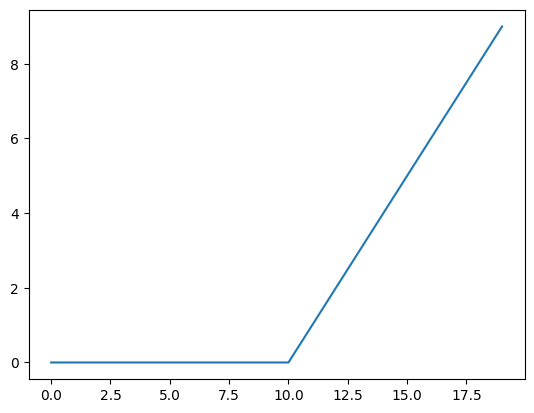

In [39]:
plt.plot(relu(A))

In [40]:
# Let's try the linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

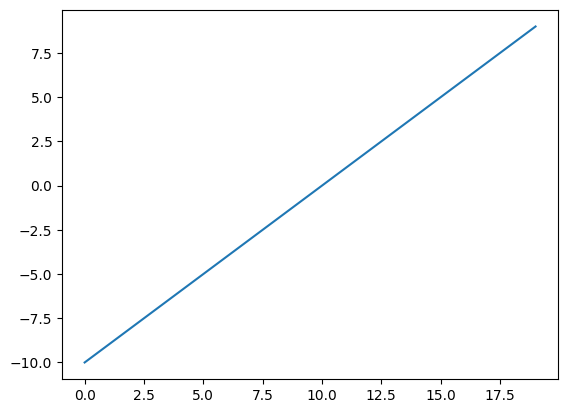

In [41]:
# Does the linear activation function change anything?

plt.plot(tf.keras.activations.linear(A))

In [42]:
# Does A even change?
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## Evaluating and improving our classification

So far we've been training and testing on the same dataset...

However, in machine learning this is basically a sin.

Let's create a training and test set.

In [43]:
# Check how many examples we have
len(X)

1000

In [44]:
# Split into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [45]:
# Let's recreate a model to fit on the training data and evaluate on the testing data

# Set random seed
tf.random.set_seed(42)

# 1. Create the model (same as model_7)
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_8.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.03),
                metrics=["accuracy"])

# 3. Fit the model
history = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 2ms/step - loss: 0.6955 - accuracy: 0.5138
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6835 - accuracy: 0.5863
Epoch 3/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6553 - accuracy: 0.6150
Epoch 4/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6014 - accuracy: 0.7287
Epoch 5/25
25/25 [==============================] - 0s 1ms/step - loss: 0.5462 - accuracy: 0.7387
Epoch 6/25
25/25 [==============================] - 0s 1ms/step - loss: 0.4959 - accuracy: 0.7600
Epoch 7/25
25/25 [==============================] - 0s 1ms/step - loss: 0.4682 - accuracy: 0.7775
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.4564 - accuracy: 0.7925
Epoch 9/25
25/25 [==============================] - 0s 1ms/step - loss: 0.4252 - accuracy: 0.8225
Epoch 10/25
25/25 [==============================] - 0s 1ms/step - loss: 0.3986 - accuracy: 0.8338
Epoch 11/25
25/25 [

In [46]:
# 4. Evaluate the model on the test dataset
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.2994 - accuracy: 0.8850


[0.2993526756763458, 0.8849999904632568]

313/313 [==============================] - 0s 907us/step
doing binary classification
313/313 [==============================] - 0s 834us/step
doing binary classification


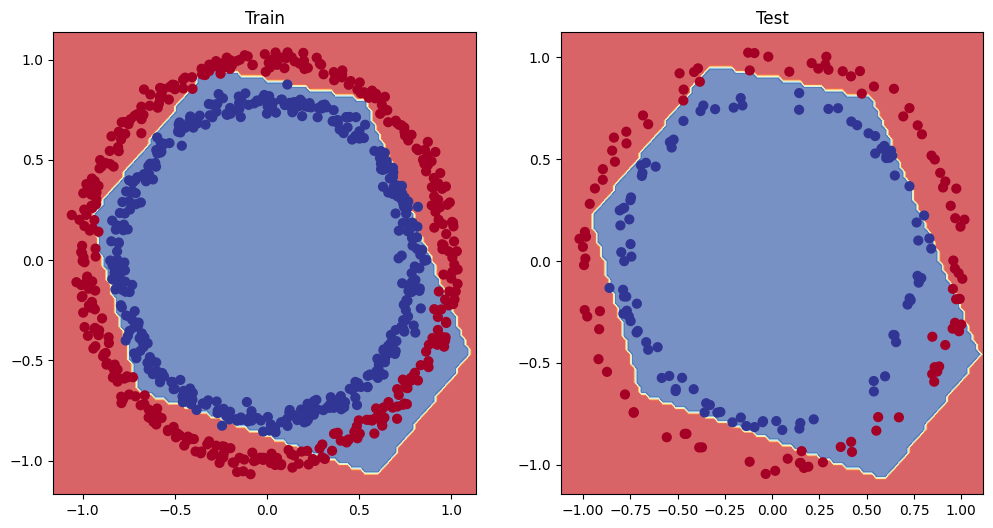

In [47]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show();

## Plot the loss (or training) curves


In [48]:
# Convert the history object into a DataFrame
pd.DataFrame(history.history)

,loss,accuracy
0,0.695512,0.51375
1,0.683499,0.58625
2,0.655338,0.61500
3,0.601416,0.72875
4,0.546173,0.73875
5,0.495897,0.76000
6,0.468151,0.77750
7,0.456383,0.79250
8,0.425232,0.82250
9,0.398612,0.83375


Text(0.5, 1.0, 'Model_8 loss curves')

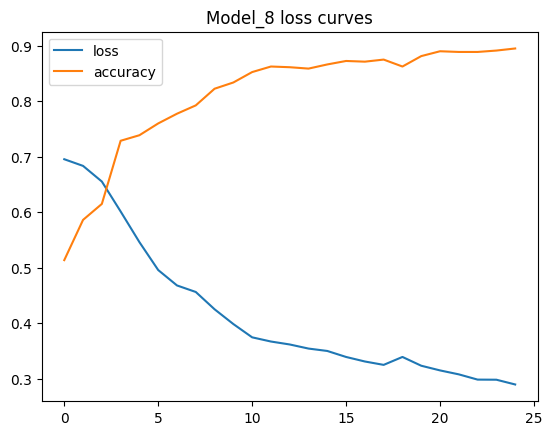

In [49]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves")


## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decrease the most during training) we're going to use the following steps:
* A learning rate **callback** - you can think of a callback as an extra piece of functionality, you can add to your **while** its training.
* Another model (we could use the same one as above, but we're practicing building models here)
* A modified loss curves plot.



In [50]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_8)
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid"),
])

# Compile the model
model_9.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model (passing lr_scheduler callback)
history_9 = model_9.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])


Epoch 1/100
25/25 [==============================] - 1s 1ms/step - loss: 0.7329 - accuracy: 0.5100 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7305 - accuracy: 0.5000 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7279 - accuracy: 0.5125 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7252 - accuracy: 0.5200 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7226 - accuracy: 0.5000 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7195 - accuracy: 0.5025 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7166 - accuracy: 0.5038 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7135 - accuracy: 0.5000 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss:

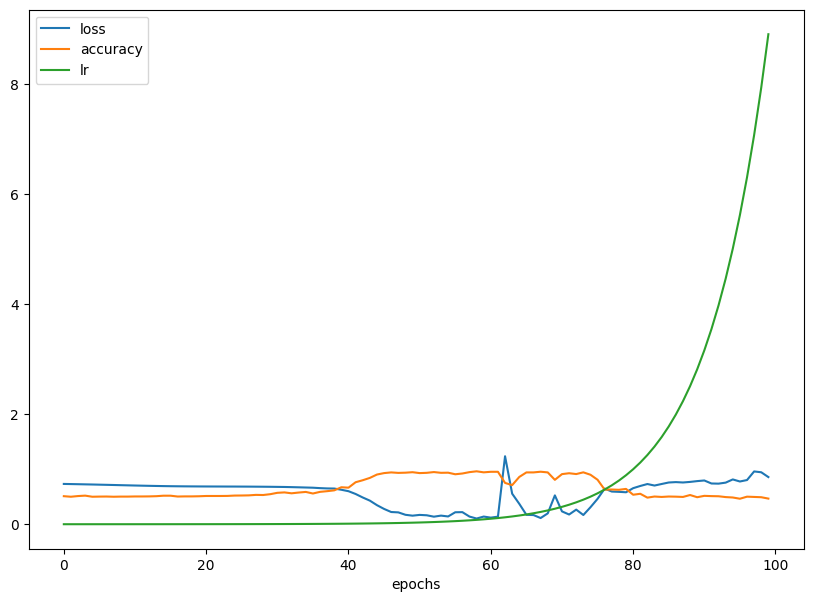

In [51]:
# Checkout the history
pd.DataFrame(history_9.history).plot(figsize=(10, 7), xlabel="epochs");

Text(0.5, 1.0, 'Learning rate vs. Loss')

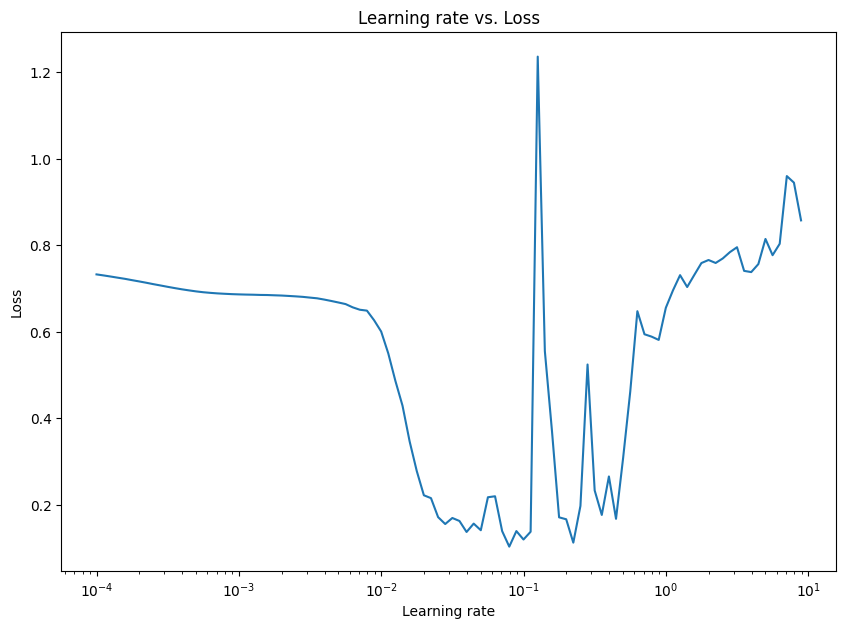

In [52]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. Loss")

In [53]:
# Example of other typical learning rates values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [54]:
# Let's try using a higher *ideal* learning rate with the same model as before

# Set random seed
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

# Compile the model
model_10.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                 metrics=["accuracy"])

# Fit the model for 20 epochs (5 less than before)
history_10 = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 2ms/step - loss: 0.6883 - accuracy: 0.5312
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6753 - accuracy: 0.5587
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6588 - accuracy: 0.5813
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6356 - accuracy: 0.6612
Epoch 5/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5993 - accuracy: 0.7088
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5463 - accuracy: 0.7887
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4874 - accuracy: 0.8575
Epoch 8/20
25/25 [==============================] - 0s 1ms/step - loss: 0.4203 - accuracy: 0.8813
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2711 - accuracy: 0.9450
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.1525 - accuracy: 0.9887
Epoch 11/20
25/25 [

In [55]:
# Evaluate the model 10
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0475 - accuracy: 0.9750


[0.047458063811063766, 0.9750000238418579]

In [56]:
# Evaluate the model 8
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.2994 - accuracy: 0.8850


[0.2993526756763458, 0.8849999904632568]

313/313 [==============================] - 0s 916us/step
doing binary classification
313/313 [==============================] - 0s 795us/step
doing binary classification


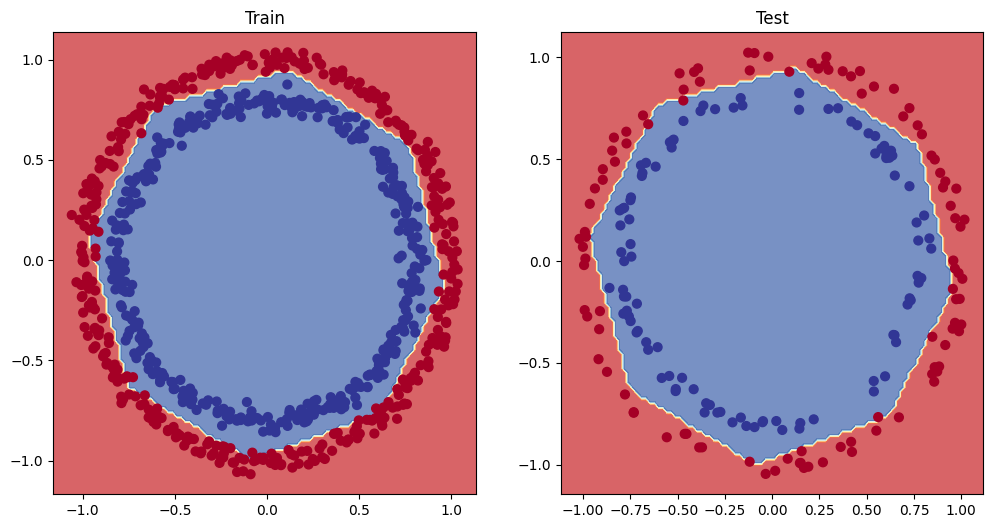

In [57]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show();

## More classification evaluation methods

Alongside visualizing our models results as much as possible, there are a handful of other classification evaluation methods & metrics you should be familiar with:
* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report (from scikit-learn)


In [58]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")


7/7 [==============================] - 0s 2ms/step - loss: 0.0475 - accuracy: 0.9750
Model loss on the test set: 0.047458063811063766
Model accuracy on the test set: 97.50%


How about a confusion matrix?

In [59]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 2ms/step


ValueError: ignored

In [60]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [61]:
y_preds[:10]

array([[9.9887216e-01],
       [9.9983084e-01],
       [9.8199433e-01],
       [9.9995923e-01],
       [2.6823008e-02],
       [2.5004670e-01],
       [9.8336625e-01],
       [4.5995592e-04],
       [9.9966407e-01],
       [3.0971561e-03]], dtype=float32)

Looks like our predictions array has come out in **prediction probability** form... the standard output from the sigmoid (or softmax) activation functions.

In [62]:
# Convert prediction probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [63]:
# Create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[96,  5],
       [ 0, 99]])

How about we prettify our confusion matrix?

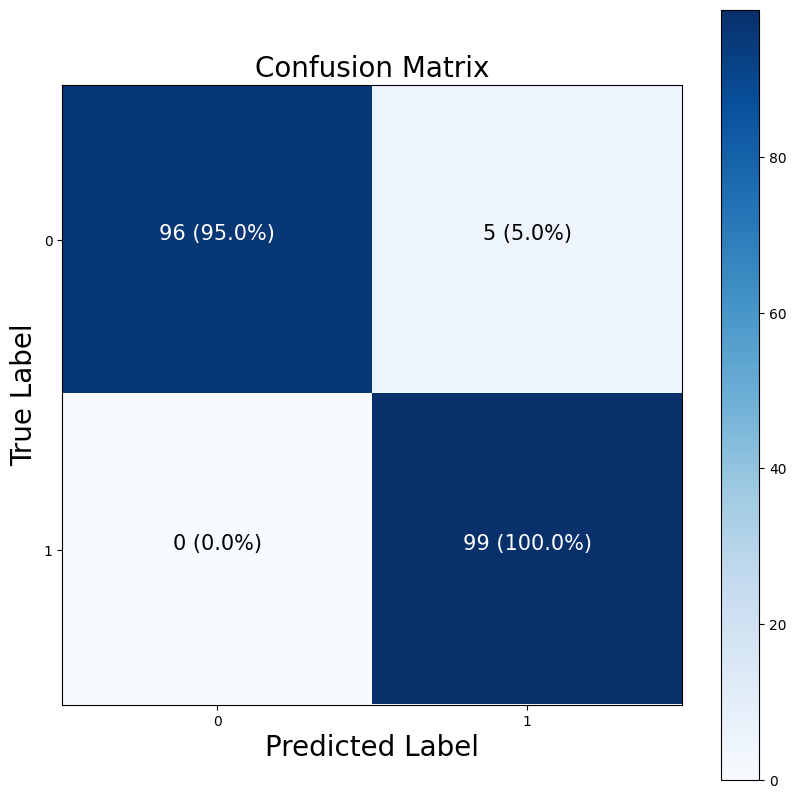

In [64]:
# Note: the confusion matrix code we're about to write is a remix of scikit-learn's plot_confusion_matrix
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True Label",
       xticks = np.arange(n_classes),
       yticks = np.arange(n_classes),
       xticklabels = labels,
       yticklabels = labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)", horizontalalignment="center", color="white" if cm[i, j] > threshold else "black",
           size=15)

# Working with a larger example (multiclass classification)

When you have more than two classes as an option, it's known as **multi-class classification**.
* This means if you have 3 different classes, it's multi-class classification.
* It also means if you have 100 different classes, it's multi-class classification.

To practice multi-class classification, we're going to build a neural network to classify images of different items of clothing.


In [65]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test set for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [66]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [67]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

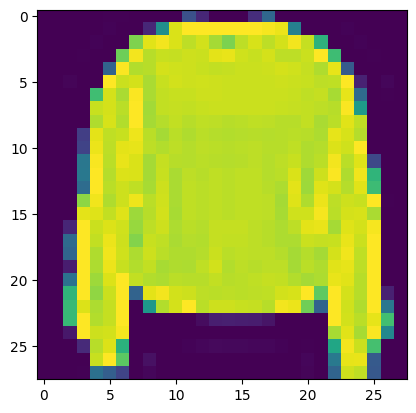

In [68]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[7]);

In [69]:
# Check out samples label
train_labels[7]

2

In [70]:
# Create a small list so we can index onto our training labels so they're human-readable
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

len(class_names)

10

Text(0.5, 1.0, 'Coat')

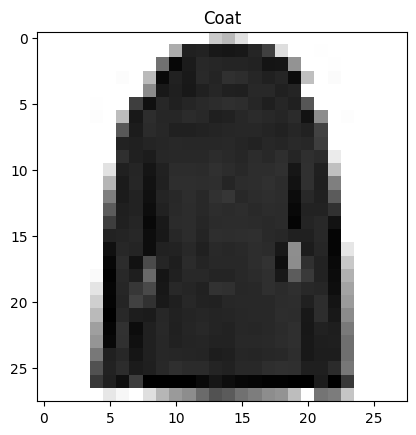

In [71]:
# Plot an example image and its label
index_of_choice = 2000
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

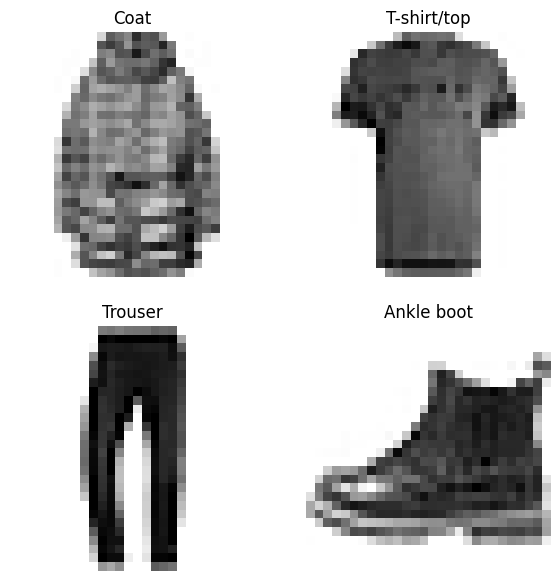

In [72]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Building a multi-class classification model

For our multi-class classification model, we can use a similar architecture to our binary classifiers, however, we're going to have to tweak a few things:
* Input shape = 28 x 28 (the shape of one image)
* Output shape = 10 (one per class of clothing)
* Loss function = tf.keras.losses.CategoricalCrossentropy()
  * If your labels are one-hot encoded, use CategoricalCrossentropy()
  * If your labels are integer form, use SparseCategoricalCrossentropy()
* Output layer activation = Softmax (not sigmoid)


In [73]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # Shape hatasi aldik ve flatten yaptik bu tek bir arraye indirir.
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# 2. Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # CategoricalCrossentropy yerine SparseCategoricalCrossentropy yazdik cunku one-hot encoding yapmak gerekli
                 optimizer="Adam",
                 metrics=["accuracy"])

# 3. Fit the model
non_norm_history = model_11.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels))

# Kodda aldigimiz hatayi duzeltmek icin SparseCategoricalCrossentropy yerine .fit kisminda tf.one_hot(test_labels, depth=10) ve tf.one_hot(train_labels, depth=10) kullanabilirdik

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3588 - accuracy: 0.0986 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy:

In [74]:
# Check the model summary
model_11.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_26 (Dense)            (None, 4)                 3140      
                                                                 
 dense_27 (Dense)            (None, 4)                 20        
                                                                 
 dense_28 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [75]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scaled (or normalized), this means they like to have the numbers in the tensors they try to find patterns between 0 and 1.

In [76]:
# We can get our training and testing data between 0 and 1 by dividing by the maximum
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# check the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [77]:
# Now our data is normalized, let's build a model to find patterns in it

# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_11)
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
norm_history = model_12.fit(train_data_norm, train_labels, epochs=10, validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1072 - accuracy: 0.5844 - val_loss: 0.7737 - val_accuracy: 0.7294
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7152 - accuracy: 0.7520 - val_loss: 0.7106 - val_accuracy: 0.7496
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6591 - accuracy: 0.7713 - val_loss: 0.6683 - val_accuracy: 0.7644
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6316 - accuracy: 0.7791 - val_loss: 0.6371 - val_accuracy: 0.7801
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6160 - accuracy: 0.7854 - val_loss: 0.6336 - val_accuracy: 0.7752
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6013 - accuracy: 0.7904 - val_loss: 0.6418 - val_accuracy: 0.7796
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5953 - accuracy: 0.7934 - val_loss: 0.6251 - val_accuracy:

> **Note:** Neural networks tend to prefer data in numerical form as well as scaled/normalized (numbers between 0 and 1).

<Axes: title={'center': 'Normalized data'}>

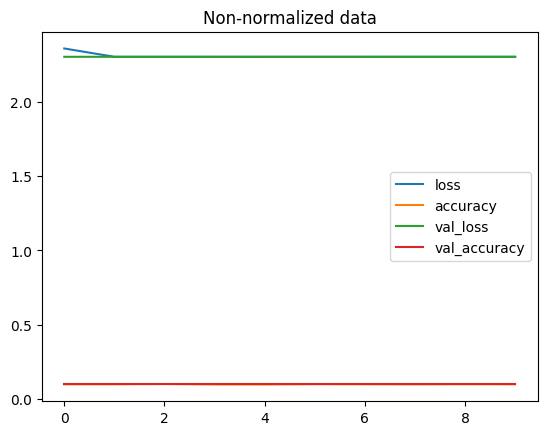

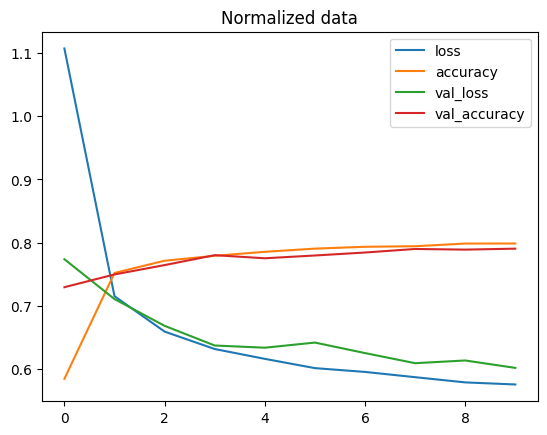

In [78]:
import pandas as pd
# Plot the non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data")

> **Note:** The same model with even *slightly* different data can produce *dramatically* different results, so when you're comparing models, it's important to make sure you're comparing them on the same criteria (e.g. same architecture but different data or same data but different architecture).

## Finding the ideal learning rate

In [79]:
# Set random seed
tf.random.set_seed(42)

# Create model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 **(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data_norm, train_labels, epochs=40, validation_data=(test_data_norm, test_labels), callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0953 - accuracy: 0.5944 - val_loss: 0.7100 - val_accuracy: 0.7488 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6415 - accuracy: 0.7718 - val_loss: 0.6235 - val_accuracy: 0.7846 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5824 - accuracy: 0.7973 - val_loss: 0.6110 - val_accuracy: 0.7810 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5578 - accuracy: 0.8050 - val_loss: 0.5764 - val_accuracy: 0.7964 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5450 - accuracy: 0.8072 - val_loss: 0.5830 - val_accuracy: 0.7939 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5359 - accuracy: 0.8113 - val_loss: 0.6045 - val_accuracy: 0.7842 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

Text(0.5, 1.0, 'Finding the ideal learning rate')

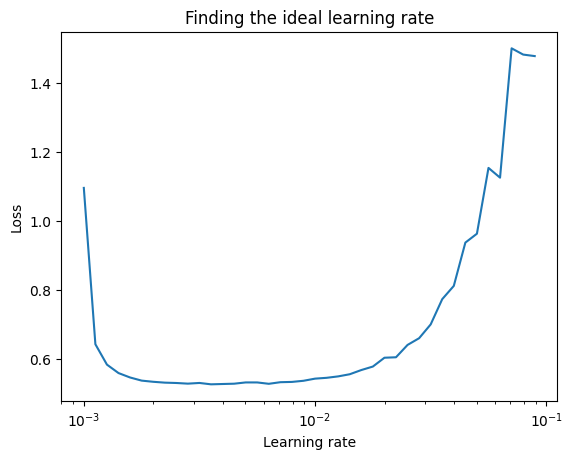

In [80]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [81]:
# Ideal learning rate bulmak icin en alt noktayı buluruz ve biraz geriden bir deger seceriz, ideal learning rate secip yeni bir model tasarlayalim

# Set random seed
tf.random.set_seed(42)

# Create model
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(), # learning_rate=0.01 is default, bu deger ideal learning rate'e uygun bir deger bu model icin
                 metrics=["accuracy"])

# Fit the model
history_14 = model_14.fit(train_data_norm, train_labels, epochs=20, validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1446 - accuracy: 0.5860 - val_loss: 0.8094 - val_accuracy: 0.7372
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7287 - accuracy: 0.7611 - val_loss: 0.6986 - val_accuracy: 0.7723
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6517 - accuracy: 0.7839 - val_loss: 0.6528 - val_accuracy: 0.7839
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6154 - accuracy: 0.7938 - val_loss: 0.6290 - val_accuracy: 0.7917
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5954 - accuracy: 0.7997 - val_loss: 0.6255 - val_accuracy: 0.7927
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5816 - accuracy: 0.8029 - val_loss: 0.6155 - val_accuracy: 0.7927
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5719 - accuracy: 0.8067 - val_loss: 0.6176 - val_accuracy:

## Evaluating our multi-class classification model

To evaluate our multi-class classification model we could:
* Evaluate its performance using other classification metrics (such as a confusion matrix)
* Assess some of its predictions (through visualizations)
* Improve its results (by training it for longer or changing the architecture)
* Save and export it for use in an application  

Let's go through the top 2...



In [82]:
# Create a confusion matrix
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  # Create the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks = np.arange(n_classes),
        yticks = np.arange(n_classes),
        xticklabels = labels,
        yticklabels = labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)", horizontalalignment="center", color="white" if cm[i, j] > threshold else "black",
            size=text_size)

In [83]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [84]:
# Make some predictions with our model
y_probs = model_14.predict(test_data_norm) # probs is short for "prediction probabilities"

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 0s 869us/step


array([[7.9230533e-09, 1.9582436e-18, 1.3319432e-08, 7.6218081e-09,
        8.0882140e-10, 1.8119916e-01, 7.8915781e-09, 6.7135572e-02,
        1.1131038e-03, 7.5055200e-01],
       [1.1839739e-04, 3.5918290e-17, 9.0957558e-01, 7.2888861e-06,
        6.6395700e-02, 7.7149475e-20, 2.3903010e-02, 0.0000000e+00,
        4.0777230e-09, 0.0000000e+00],
       [3.6203839e-02, 9.6145535e-01, 1.3501119e-04, 2.3874168e-04,
        5.1950851e-06, 7.8229445e-05, 1.8803289e-03, 1.5963410e-07,
        3.1718841e-06, 1.3745761e-11],
       [2.7041504e-02, 9.5372438e-01, 6.0975488e-04, 1.2797709e-02,
        1.3172645e-04, 1.5595991e-03, 3.9601750e-03, 9.5928044e-05,
        7.8492376e-05, 5.8953532e-07],
       [2.3539333e-01, 1.2997049e-05, 1.4700106e-01, 5.7524838e-03,
        3.2987647e-02, 1.9656989e-07, 5.7833266e-01, 1.6147449e-15,
        5.1956548e-04, 3.8006782e-23]], dtype=float32)

> **Note:** Remember to make predictions on the same kind of data your model was trained on (e.g. if your model was trained on normalized data, you'll want to make predictions on normalized data).

In [85]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([7.9230533e-09, 1.9582436e-18, 1.3319432e-08, 7.6218081e-09,
        8.0882140e-10, 1.8119916e-01, 7.8915781e-09, 6.7135572e-02,
        1.1131038e-03, 7.5055200e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [86]:
# Convert all of the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [87]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [88]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true = test_labels,
                 y_pred = y_preds)

array([[742,  15,  29,  91,   3,   2, 109,   1,   8,   0],
       [ 11, 925,   3,  53,   2,   0,   5,   1,   0,   0],
       [ 22,   2, 650,  41, 161,   1, 120,   0,   3,   0],
       [ 29,  15,  12, 874,  38,   1,  26,   0,   5,   0],
       [  3,   0, 103,  54, 736,   0,  96,   0,   8,   0],
       [  0,   0,   0,   3,   0, 908,   0,  42,  17,  30],
       [143,   2, 127,  88, 141,   0, 493,   0,   6,   0],
       [  0,   0,   0,   0,   0,  53,   0, 922,   1,  24],
       [  1,   1,   0,  11,  16,   7,  52,   4, 908,   0],
       [  0,   0,   0,   0,   0,  21,   0,  48,   2, 929]])

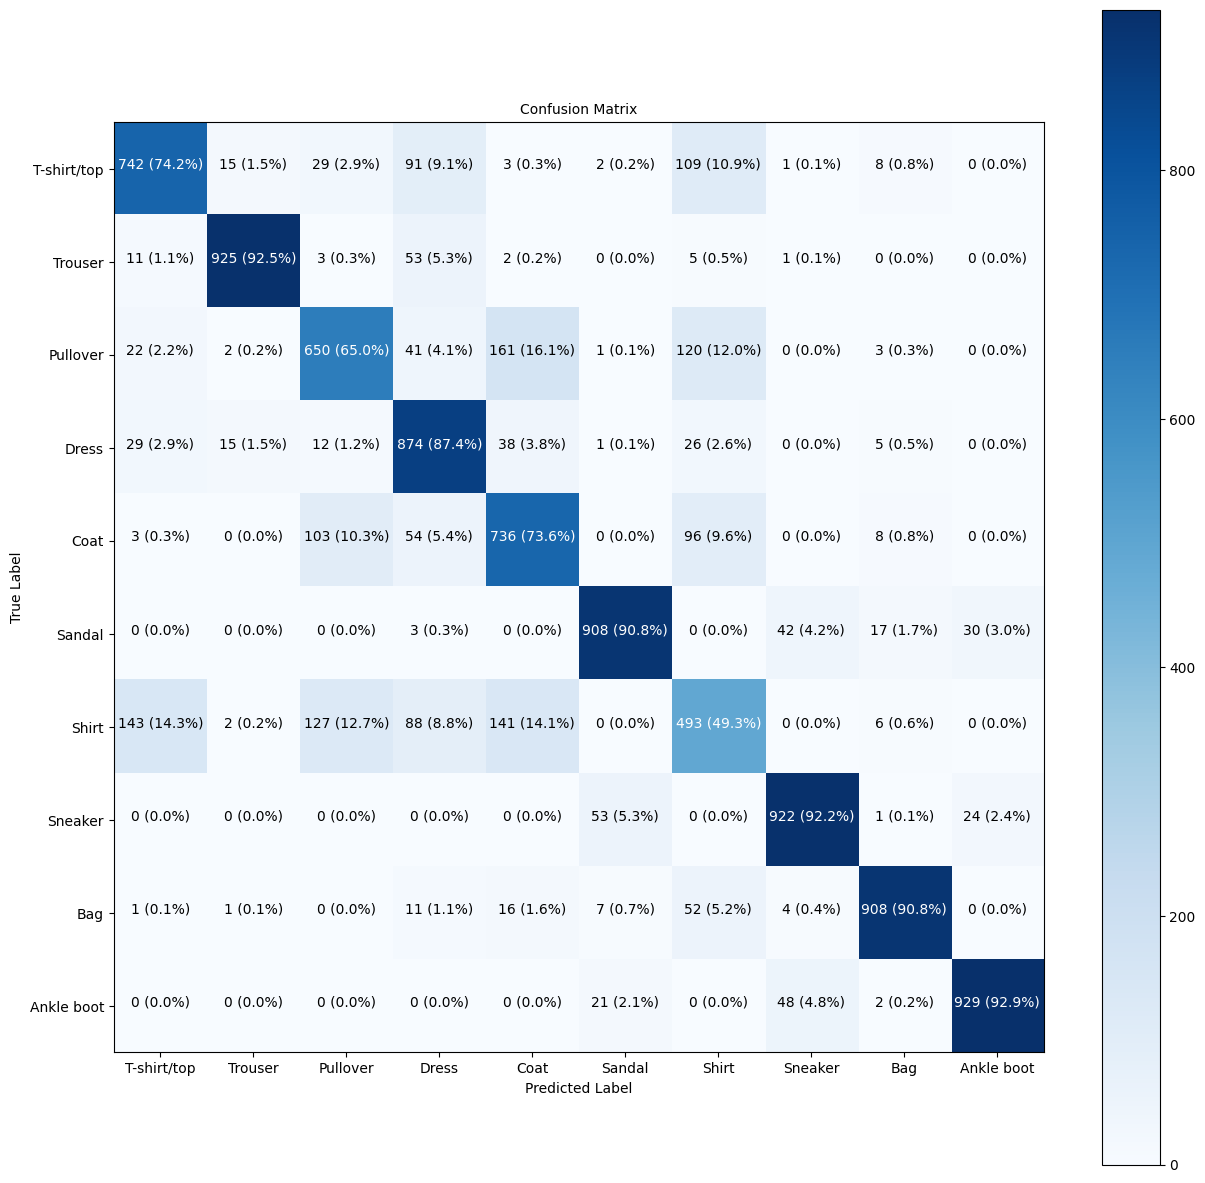

In [89]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

> **Note:** Often when working with images and other forms of visual data, it's a good idea to visualize as much as possible to develop a further understanding of the data and the inputs and outputs of your models.

How about we create a fun little function for:
* Plot a random image
* Make a prediction on said image
* Label the plot with the truth label & the predicted level

In [90]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it and labels it with a prediction and truth label.
  """
  # Set up random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong.
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label, 100*tf.reduce_max(pred_probs), true_label), color = color) # set the color to green or red based on prediction

1/1 [==============================] - 0s 23ms/step


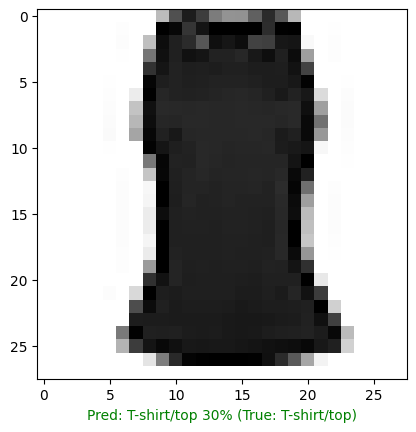

In [99]:
# Check out our random image as well as prediction
plot_random_image(model=model_14, images=test_data_norm, true_labels=test_labels, classes=class_names)

## What patterns is our model learning?

In [100]:
# Find the layers of our most recent model
model_14.layers

In [101]:
# Extract a particular layer
model_14.layers[1]

In [102]:
# Get the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[ 0.01101095, -0.17027391, -0.2328624 , -0.10649079],
        [-0.5407362 ,  0.00407215, -0.7748564 , -0.33060217],
        [ 0.1063965 , -0.9024356 , -0.41855496, -0.11916342],
        ...,
        [-0.24748187, -0.19941679, -0.2144989 , -0.62520176],
        [-0.47965643,  0.06416878,  0.03053284, -0.9305032 ],
        [ 0.07944269, -0.00476957, -0.17156239, -0.42474955]],
       dtype=float32),
 (784, 4))

In [103]:
model_14.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_35 (Dense)            (None, 4)                 3140      
                                                                 
 dense_36 (Dense)            (None, 4)                 20        
                                                                 
 dense_37 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


# Now let's check out the bias vector...

In [104]:
# Bias and biases shapes
biases, biases.shape

(array([ 0.9297171 ,  0.11859392,  2.5617864 , -0.33106214], dtype=float32),
 (4,))

Every neuron has a bias vector. Each of these is paired with a weights matrix.

The bias vector get initiliazed as zeros (at least in the case of a TensorFlow Dense layer).

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

In [105]:
model_14.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_35 (Dense)            (None, 4)                 3140      
                                                                 
 dense_36 (Dense)            (None, 4)                 20        
                                                                 
 dense_37 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


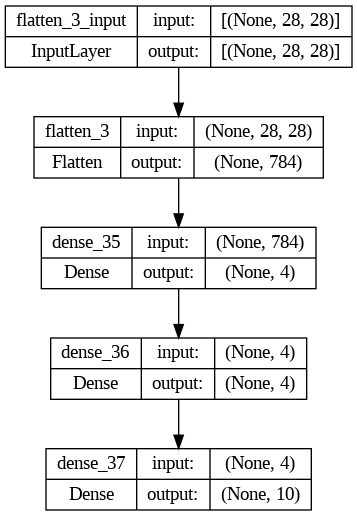

In [107]:
# Let's check out another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model
# See the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)